In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
sns.set(style="darkgrid")

## create a header cell in which you describe the dataset
- give the URL of where to find the dataset and explain how to download it
- give at least two interesting questions you have about the data 

Clone this GitHub Repo and navigate to the 1955 csv data all the way to 2005 (by years of 5, i.e. 1955, 1965...) . My dataset is a compilation of 1955-2005 data.

https://github.com/cmusam/fortune500/blob/master/csv/fortune500-1955.csv

##### Questions:
- Which companies dropped out of the top 500 in terms of profit by 2005?
- If any top companies went bankrupt / closed or dropped, what might've been the cause?

## load the data into a pandas dataframe and use pd.describe() to get a rough overview of the data

In [2]:
df = pd.read_csv('fortune500.csv', na_values=':')
df.columns = ['year', 'rank', 'company', 'revenue', 'profit']

with open("fortune500.csv",'r',encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    data = [row for row in reader]
    csvfile.close()
data[0]

{'Year': '1955',
 'Rank': '1',
 'Company': 'General Motors',
 'Revenue (in millions)': '9823.5',
 'Profit (in millions)': '806'}

In [3]:
len(df) 

3000

In [4]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object

In [5]:
df.describe()

,year,rank,revenue
count,3000.000000,3000.000000,3000.00000
mean,1980.000000,250.500000,5170.15600
std,17.081098,144.361341,13863.35326
min,1955.000000,1.000000,49.70000
25%,1965.000000,125.750000,315.27500
50%,1980.000000,250.500000,1188.45000
75%,1995.000000,375.250000,4805.15000
max,2005.000000,500.000000,288189.00000


## analyze your data using the following features:

### print the array of columns and the index array

In [6]:
print(df.columns)
df.index.array

Index(['year', 'rank', 'company', 'revenue', 'profit'], dtype='object')


<PandasArray>
[   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
 ...
 2990, 2991, 2992, 2993, 2994, 2995, 2996, 2997, 2998, 2999]
Length: 3000, dtype: int64

### create some simple plot of part of the data

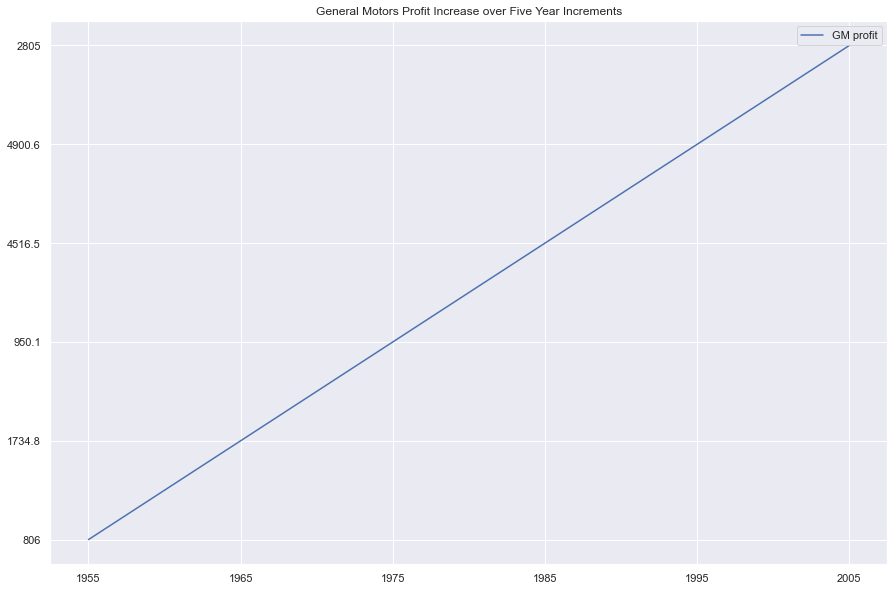

In [7]:
plt.figure(figsize = (15, 10))
highest_profit = [d['Profit (in millions)'] for d in data if d['Company'] == 'General Motors']
years = [d['Year'] for d in data if d['Company'] == 'General Motors']

plt.plot(years, highest_profit, label = 'GM profit')
plt.title('General Motors Profit Increase over Five Year Increments')
plt.legend()

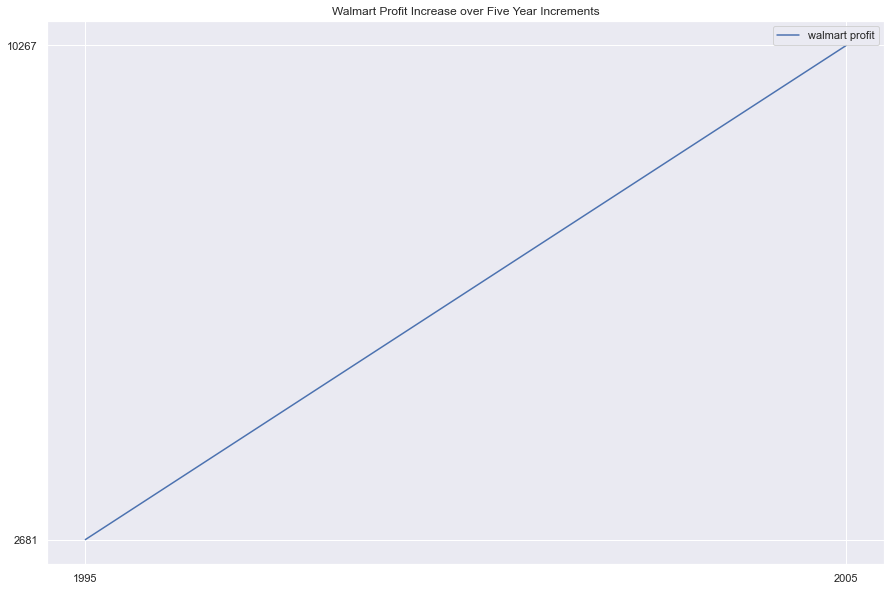

In [8]:
plt.figure(figsize = (15, 10))
profit_walmart = [d['Profit (in millions)'] for d in data if d['Company'] == 'Wal-Mart Stores']
years = [d['Year'] for d in data if d['Company'] == 'Wal-Mart Stores']

plt.plot(years, profit_walmart, label = 'walmart profit')
plt.title('Walmart Profit Increase over Five Year Increments')
plt.legend()

### create a pivot table and plot some data from that pivot table

In [20]:
# Revenue of companies over 5 year periods ( in millions)
companypt = pd.pivot_table(df, values = 'revenue', index ='year', columns = 'company')
companypt                                                                                              

company,3M,A.H. Robins,A.O. Smith,ACF Industries,AES,AFLAC,AGCO,AK Steel Holding,AM International,AMAX,...,Wyman-Gordon,Xcel Energy,Xerox,Yale & Towne Manufacturing,Yellow Roadway,York International,Young (L.A.) Spring & Wire,Youngstown Sheet & Tube,Yum Brands,Zenith Electronics
year,,,,,,,,,,,,,,,,,,,,,
1955,230.9,NaN,249.6,245.1,NaN,NaN,NaN,NaN,65.4,509.5,...,NaN,NaN,NaN,87.9,NaN,93.3,53.5,428.2,NaN,138.6
1965,903.9,NaN,299.9,277.7,NaN,NaN,NaN,NaN,244.7,438.2,...,NaN,NaN,268.0,NaN,NaN,NaN,NaN,725.9,NaN,362.3
1975,2937.0,NaN,567.7,535.1,NaN,NaN,NaN,NaN,540.8,1163.4,...,NaN,NaN,3576.4,NaN,NaN,NaN,NaN,NaN,NaN,910.5
1985,7705.0,631.9,920.9,NaN,NaN,NaN,NaN,NaN,598.5,2398.9,...,425.5,NaN,8971.3,NaN,NaN,NaN,NaN,NaN,NaN,1716.0
1995,15079.0,NaN,NaN,NaN,NaN,6110.8,NaN,NaN,NaN,NaN,...,NaN,2486.5,17837.0,NaN,2867.5,2421.9,NaN,NaN,NaN,NaN
2005,20011.0,NaN,NaN,NaN,9887.0,13281.0,5273.3,5243.1,NaN,NaN,...,NaN,8506.7,15722.0,NaN,6767.5,4510.1,NaN,NaN,9011.0,NaN


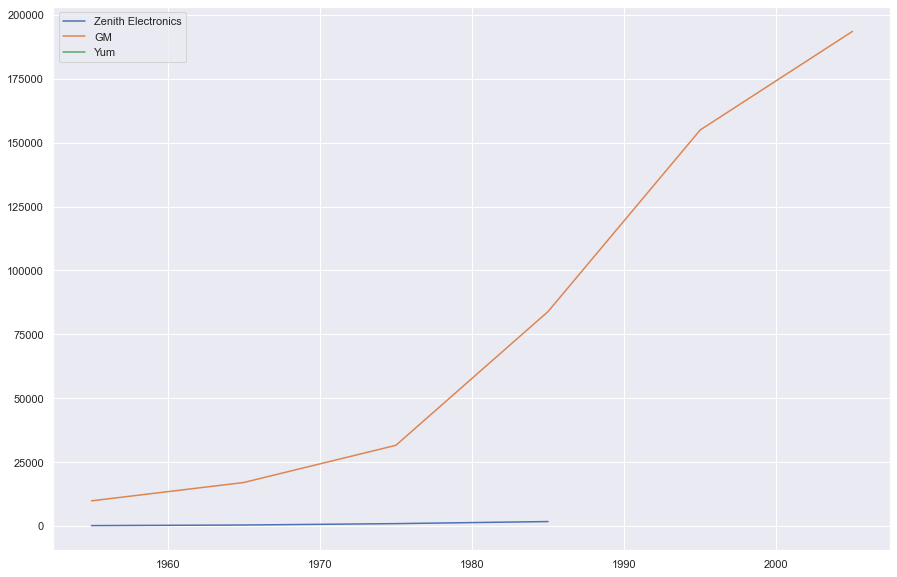

In [21]:
plt.figure(figsize = (15, 10))
z = companypt['Zenith Electronics']
g = companypt['General Motors']
y = companypt['Yum Brands']
plt.plot(z, label = "Zenith Electronics")
plt.plot(g, label = "GM")
plt.plot(y, label = "Yum")
plt.legend()

### use the groupby feature

In [10]:
df.groupby(['revenue','company']).mean()

year  rank
revenue  company                         
49.7     Copperweld Steel      1955   500
         Goodall-Sanford       1955   499
50.1     Cuban-American Sugar  1955   498
50.2     Bullard               1955   497
         Signal Oil Gas        1955   496
...                             ...   ...
154951.2 General Motors        1995     1
172233.0 Ford Motor            2005     4
193517.0 General Motors        2005     3
270772.0 Exxon Mobil           2005     2
288189.0 Wal-Mart Stores       2005     1

[3000 rows x 2 columns]

### create a discussion cell in which you discuss what your analysis tells you about the data

The revenue of various companies changed significantly from 1955 to 2005. From what I can tell, this is due to the fact that many companies products changed with the development of technology and other customer needs at the time.

In the pivot table, I noticed that some companies had NaN for their profit/revenue over these periods, and I interpreted that this means they reached fortune500 over that one period but did not make it back again for the next one (10 years later).

In the groupby, I used the revenue and the company do see the companies with the lowest/highest revenue and when this was. I found that the highest revenue was from Wal-mart stores in 2005 (the latest date) and the lowest is Copperweld Steel (from 1955). These results make sense as they reflect the growth of the US marketplace over time.